# LOADING LIBRARIES

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


# LOADING DATASET

In [54]:
df = pd.read_csv("actual.csv")
test = pd.read_csv("data_set_ALL_AML_independent.csv")
train = pd.read_csv("data_set_ALL_AML_train.csv")


In [55]:
df.head()

,patient,cancer
0,1,ALL
1,2,ALL
2,3,ALL
3,4,ALL
4,5,ALL


In [56]:
df.shape

(72, 2)

In [57]:
train.head()

,Gene Description,Gene Accession Number,1,call,2,call.1,3,call.2,4,call.3,...,29,call.33,30,call.34,31,call.35,32,call.36,33,call.37
0,AFFX-BioB-5_at (endogenous control),AFFX-BioB-5_at,-214,A,-139,A,-76,A,-135,A,...,15,A,-318,A,-32,A,-124,A,-135,A
1,AFFX-BioB-M_at (endogenous control),AFFX-BioB-M_at,-153,A,-73,A,-49,A,-114,A,...,-114,A,-192,A,-49,A,-79,A,-186,A
2,AFFX-BioB-3_at (endogenous control),AFFX-BioB-3_at,-58,A,-1,A,-307,A,265,A,...,2,A,-95,A,49,A,-37,A,-70,A
3,AFFX-BioC-5_at (endogenous control),AFFX-BioC-5_at,88,A,283,A,309,A,12,A,...,193,A,312,A,230,P,330,A,337,A
4,AFFX-BioC-3_at (endogenous control),AFFX-BioC-3_at,-295,A,-264,A,-376,A,-419,A,...,-51,A,-139,A,-367,A,-188,A,-407,A


In [58]:
test.head()

,Gene Description,Gene Accession Number,39,call,40,call.1,42,call.2,47,call.3,...,65,call.29,66,call.30,63,call.31,64,call.32,62,call.33
0,AFFX-BioB-5_at (endogenous control),AFFX-BioB-5_at,-342,A,-87,A,22,A,-243,A,...,-62,A,-58,A,-161,A,-48,A,-176,A
1,AFFX-BioB-M_at (endogenous control),AFFX-BioB-M_at,-200,A,-248,A,-153,A,-218,A,...,-198,A,-217,A,-215,A,-531,A,-284,A
2,AFFX-BioB-3_at (endogenous control),AFFX-BioB-3_at,41,A,262,A,17,A,-163,A,...,-5,A,63,A,-46,A,-124,A,-81,A
3,AFFX-BioC-5_at (endogenous control),AFFX-BioC-5_at,328,A,295,A,276,A,182,A,...,141,A,95,A,146,A,431,A,9,A
4,AFFX-BioC-3_at (endogenous control),AFFX-BioC-3_at,-224,A,-226,A,-211,A,-289,A,...,-256,A,-191,A,-172,A,-496,A,-294,A


# REMOVING UNNECESSARY COLUMNS FROM TRAINING SET

In [59]:
train = train.drop(['Gene Description','Gene Accession Number'], axis=1)
tcol = [col for col in train.columns if "call" not in col]
train = train[tcol]
train.head()

,1,2,3,4,5,6,7,8,9,10,...,35,36,37,38,28,29,30,31,32,33
0,-214,-139,-76,-135,-106,-138,-72,-413,5,-88,...,7,-213,-25,-72,-4,15,-318,-32,-124,-135
1,-153,-73,-49,-114,-125,-85,-144,-260,-127,-105,...,-100,-252,-20,-139,-116,-114,-192,-49,-79,-186
2,-58,-1,-307,265,-76,215,238,7,106,42,...,-57,136,124,-1,-125,2,-95,49,-37,-70
3,88,283,309,12,168,71,55,-2,268,219,...,132,318,325,392,241,193,312,230,330,337
4,-295,-264,-376,-419,-230,-272,-399,-541,-210,-178,...,-377,-209,-396,-324,-191,-51,-139,-367,-188,-407


# SCALING THE DATA

In [60]:
sc = StandardScaler()
train_scaled = sc.fit_transform(train)
train_scaled

array([[-0.3777897 , -0.33591204, -0.3115323 , ..., -0.26221319,
        -0.32867813, -0.34243832],
       [-0.35084785, -0.30917669, -0.30066921, ..., -0.2692815 ,
        -0.31021124, -0.36277969],
       [-0.30888923, -0.28001085, -0.40447202, ..., -0.22853475,
        -0.29297548, -0.31651305],
       ...,
       [-0.26737228, -0.27514987, -0.26445893, ..., -0.25971849,
        -0.26178696, -0.29337973],
       [-0.19891348, -0.2488196 , -0.18922201, ..., -0.19360897,
        -0.15549976,  0.02649823],
       [-0.29961417, -0.2852769 , -0.29745052, ..., -0.26221319,
        -0.27902272, -0.29258203]])

# USING PCA TO REDUCE DIMENSIONALITY

In [61]:
pc = PCA(n_components=2)
train_reduced = pc.fit_transform(train_scaled)
train_reduced

array([[-1.92595476,  0.12682361],
       [-2.00074115,  0.0939013 ],
       [-1.66506552,  0.11901905],
       ...,
       [-1.57041306,  0.11973963],
       [-0.35809208, -0.39470012],
       [-1.69365856,  0.11018486]])

# VISUALIZING

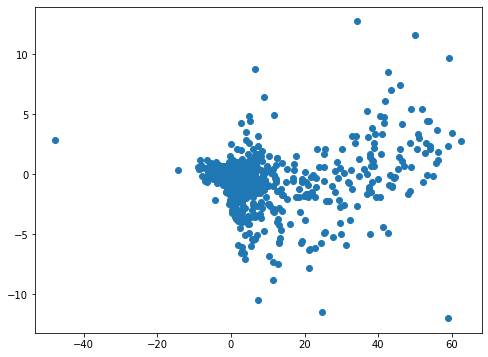

In [62]:
plt.figure(figsize=(8,6))
plt.scatter(train_reduced[:,0],train_reduced[:,1])